In [ ]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import tridiagonal
import wavefunction
import vapsRichardson
import mpmath as mp

rmin = -2.0
rmax = 2.0
Ninter = np.array([100,200,350,600,900,1300,1900,2500,3500,5000])
n1 = 1
n2 = 4

ervec = np.zeros((4,11))

for p in range(1,11):

    Ninterv = Ninter[p-1]
    h = (rmax - rmin)/Ninterv
    n = Ninterv - 1

       
    #Definicio de les abscisses i del potencial
    
    v = np.zeros(n)
    x = np.zeros(n)
    lamb = 6
    Vo = lamb*(lamb-1)

    for k in range(1,n+1):
        v[k-1] = -Vo/((np.cosh(rmin + k*h))**2)
        x[k-1] = rmin + k*h 

    #Calcul dels valors propis i les funcions propies, aixi com els parametres a i b de la funcio analitica   
    
    vaps = tridiagonal.tridiagonal(v,h,n,n1,n2)

    wfnt = np.zeros((n2,n))
    wfat = np.zeros((n2,n))

    a = np.zeros(n2)
    b = np.zeros(n2)

    for i in range(1,n2+1):
        wfnt[i-1,:] = wavefunction.wavefunction(v,h,n,vaps[i-1])
        a[i-1] = .5*(lamb - np.sqrt(-vaps[i-1]))
        b[i-1] = .5*(lamb + np.sqrt(-vaps[i-1]))


    #Wavefunction analitica
    for i in range(1,n+1):
        #Ground State
        wfat[0,i-1] = (np.cosh(x[i-1]))**(lamb) * mp.hyp2f1(a[0],b[0],.5,-(np.sinh(x[i-1])**2)).real
        #1st Excited State
        wfat[1,i-1] = (np.cosh(x[i-1]))**(lamb) * np.sinh(x[i-1]) * mp.hyp2f1(a[1]+.5,b[1]+.5,1.5,-(np.sinh(x[i-1])**2)).real
        #2nd Excited State
        wfat[2,i-1] = (np.cosh(x[i-1]))**(lamb) * mp.hyp2f1(a[2],b[2],.5,-(np.sinh(x[i-1])**2)).real
        #3rd Excited State
        wfat[3,i-1] = (np.cosh(x[i-1]))**(lamb) * np.sinh(x[i-1]) * mp.hyp2f1(a[3]+.5,b[3]+.5,1.5,-(np.sinh(x[i-1])**2)).real

    #Normalitzacio de les funcions d'ona analitiques
    
    suma0 = 0
    suma1 = 0
    suma2 = 0
    suma3 = 0

    for i in range(1,n+1):    
        suma0 = suma0 + (wfat[0,i-1])**2
        suma1 = suma1 + (wfat[1,i-1])**2
        suma2 = suma2 + (wfat[2,i-1])**2
        suma3 = suma3 + (wfat[3,i-1])**2

    xnorm0 = np.sqrt(1.0/(h*suma0))
    xnorm1 = np.sqrt(1.0/(h*suma1))
    xnorm2 = np.sqrt(1.0/(h*suma2))
    xnorm3 = np.sqrt(1.0/(h*suma3))

    for k in range(1,n+1):
        wfat[0,k-1] = xnorm0*wfat[0,k-1]
        wfat[1,k-1] = -xnorm1*wfat[1,k-1]
        wfat[2,k-1] = -xnorm2*wfat[2,k-1]
        wfat[3,k-1] = xnorm3*wfat[3,k-1]

        
    #Calcul de les discrepancies entre resultats analítics i numerics    
    
    errwf = abs(wfat - wfnt)
    ersuma0 = 0
    ersuma1 = 0
    ersuma2 = 0
    ersuma3 = 0



    for i in range(1,n+1):    
        ersuma0 = ersuma0 + errwf[0,i-1]/Ninterv
        ersuma1 = ersuma1 + errwf[1,i-1]/Ninterv
        ersuma2 = ersuma2 + errwf[2,i-1]/Ninterv
        ersuma3 = ersuma3 + errwf[3,i-1]/Ninterv

    ervec[0,p-1] = ersuma0
    ervec[1,p-1] = ersuma1
    ervec[2,p-1] = ersuma2
    ervec[3,p-1] = ersuma3

ervec=ervec[:,0:10]



In [6]:
#Grafics potencial i energies dels estats
plt.plot(x, v)
plt.plot(x, wfat[0,:] + vaps[0], 'r-')
plt.plot(x, wfat[1,:] + vaps[1], 'k-')
plt.plot(x, wfat[2,:] + vaps[2], 'g-')
plt.plot(x, wfat[3,:] + vaps[3], 'm-')
plt.ylim((-Vo,1))
plt.xlim((-2, 2))
plt.xlabel('Position')
plt.ylabel('Energy')
plt.yticks(vaps, ['E0','E1','E2','E3'])
plt.title('Representacio dels diferents nivells amb el potencial')


#Grafics funcions propies analitiques i numeriques
f, axarr = plt.subplots(4, sharex=True)
axarr[0].plot(x, wfnt[0,:], 'r-')
axarr[0].plot(x, wfat[0,:], 'k-')
axarr[1].plot(x, wfnt[1,:], 'r-')
axarr[1].plot(x, wfat[1,:], 'k-')
axarr[2].plot(x, wfnt[2,:], 'r-')
axarr[2].plot(x, wfat[2,:], 'k-')
axarr[3].plot(x, wfnt[3,:], 'r-')
axarr[3].plot(x, wfat[3,:], 'k-')
axarr[0].set_title('Primers nivells del Poschl-Teller modificat')


Text(0.5,1,'Primers nivells del Poschl-Teller modificat')

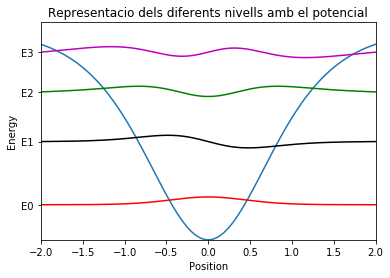

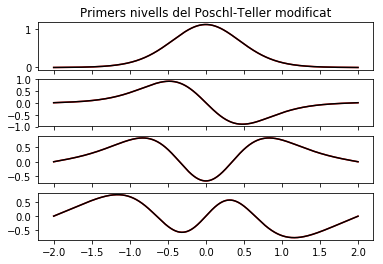

In [7]:
#Grafics dels errors en cada estat propi

errwf = abs(wfat - wfnt)
f, axarr = plt.subplots(4, sharex=True)
axarr[0].plot(x, errwf[0,:], 'r-')

axarr[1].plot(x, errwf[1,:], 'r-')

axarr[2].plot(x, errwf[2,:], 'r-')

axarr[3].plot(x, errwf[3,:], 'r-')

axarr[0].set_title('Errors in the eigenstates')


Text(0.5,1,'Errors in the eigenstates')

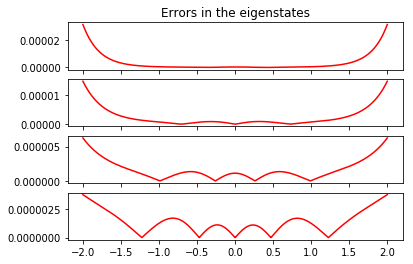

In [8]:
#Grafic de l'error mitja amb nombre d'intervals creixent
plt.figure(figsize=(10,7))
plt.semilogy(Ninter, ervec[0,:], 'r-',linewidth=4.0)
plt.semilogy(Ninter, ervec[1,:], 'y-',linewidth=4.0)
plt.semilogy(Ninter, ervec[2,:], 'g-',linewidth=4.0)
plt.semilogy(Ninter, ervec[3,:], 'b-',linewidth=4.0)
plt.legend(('Ground state','1st excited state','2nd excited state','3rd excited state'),loc='upper right',fontsize=8,prop={'size': 16})
plt.xlabel('Number of intervals',fontsize=15)
plt.ylabel('Mean error',fontsize=15)
plt.grid()
plt.title('Evolution with n of the mean error for each eigenstate',fontsize=20)

Text(0.5,1,'Evolution with n of the mean error for each eigenstate')

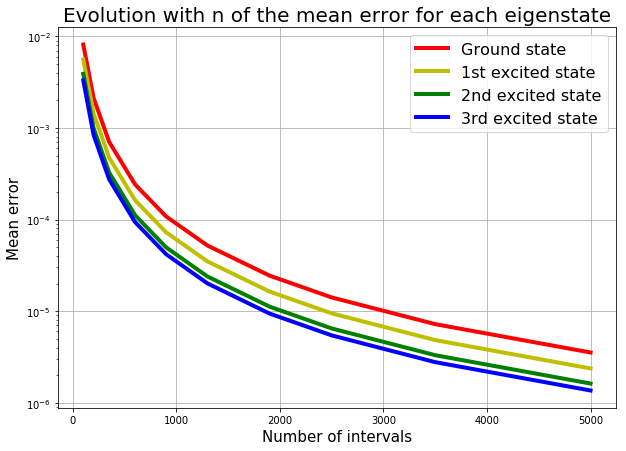